In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [2]:
with open('../data/census.pkl', 'rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27676, 108), (4885, 108), (27676,), (4885,))

In [4]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [5]:
predictions = knn.predict(X_test)
predictions

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [6]:
accuracy_score(y_test, predictions)

0.8223132036847492

In [7]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      3693
        >50K       0.66      0.57      0.61      1192

    accuracy                           0.82      4885
   macro avg       0.76      0.74      0.75      4885
weighted avg       0.82      0.82      0.82      4885



0.8223132036847492

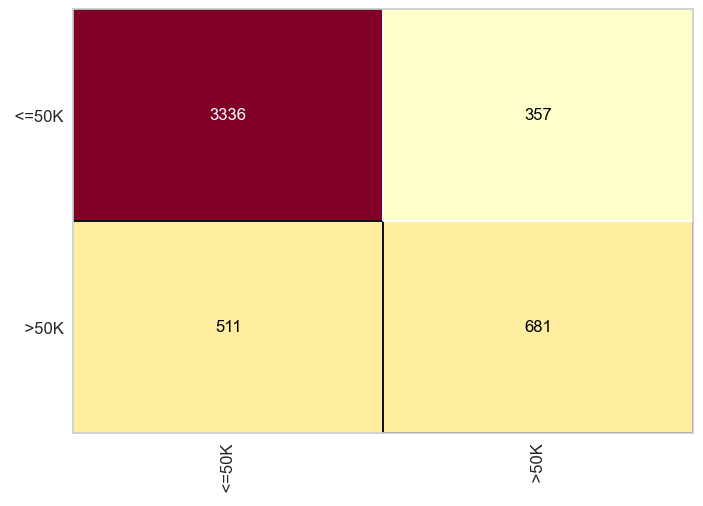

In [8]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)